In [1]:
#Initialization
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
#import Levenshtein

In [2]:
#Loading conversion table for peptide description
#Positionwise carbon
df=pd.read_excel("aa_properties.xlsx")
# H-wise Carbon 
#df=pd.read_excel("aa_properties2.xlsx")
# identity
#df=pd.read_excel("aa_properties3.xlsx")
df

,aa,CA-Gly,Pro-MC,CB,CB-Pro,Carboxyl,Amide,His,Trp,Phe-Tyr,OH-Tyr,CG,CD,CE,OH,SH,S,NH3,Arg,MC
0,A,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,C,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
2,D,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,E,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,4
4,F,0,0,1,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,4
5,G,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
6,H,0,0,1,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,4
7,I,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,4
8,K,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,4
9,L,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,4


In [3]:
# Function for converting a peptide to atom composition
def peptrans(peptide):
    rows=[]
    for l in peptide:
        rows.append(df[df.aa==l])
    return pd.concat(rows).sum()


In [4]:
# Reading in the peptide microarray data
pf=pd.read_excel("../Clean_results_2_2019.xlsx")

/home/gergely/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/home/gergely/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


In [5]:
# applying the function to all peptides in the experimental data
transpf=pf['Peptide'].apply(peptrans)

In [6]:
# Merging the original table with fluorescece values with the atom composition
mergepf = pd.concat([pf, transpf], axis=1, sort=False)
#mergepf=mergepf.set_index('Protein')

In [7]:
# Renaming and new columns for convenience
mergepf["Prot_pep"] = mergepf["Protein"].map(str) +"_"+ mergepf["Peptide"]
mergepf["Prot_res_pep"] = mergepf["Protein"].map(str) +"_"+ mergepf["Residue number"].map(str)+"_"+ mergepf["Peptide"]
mergepf=mergepf.set_index('Prot_res_pep')
mergepf=mergepf.rename(columns={u'Survivin, 1 µg/ml': u'Fluorescence'})

In [8]:
# Removing peptides with Cys at the C terminus, because of binding artifacts
i=0
LastClst=[]
for idx,pept in mergepf.iterrows():
    if pept['Peptide'][-1]=='C':
        print (pept['Peptide'], pept['Fluorescence'])
        i=i+1
        LastClst.append(True)
    else:
        LastClst.append(False)
print (i)
mergepf['LastC']=LastClst

VKSYLYQILQGIVFC 2169.5
HPSLGHQVSYLPRMC 205.5
EQNSVTLEVLLVKVC 742.0
EARDDLHCPWCTLNC 1388.5
SRGIIRIINPITMQC 209.5
VKDVLFIRPRKYIHC 1022.5
FWLQELNEDLAEMGC 4460.0
CRSPDSEEGNDMVFC 3059.0
SWLCRSCVLGIYPQC 768.0
HVSCALWIPEVSIAC 369.5
SHIPPSRWALVCNLC 817.5
VCNLCKLKTGACIQC 373.0
KLKTGACIQCSIKSC 394.0
AKESSPAWRTPSSEC 937.5
WLSRSVTSFFRYRQC 1154.0
GGTTAPGPIHLLELC 1730.0
KKTAEEPAASGRIIC 889.0
KKHGSGSGSGAKERC 990.0
AQNQEICSSGQHNAC 399.5
VQREQSLHSFHTLFC 1854.5
PCDHPRQPCDSSCPC 297.0
ECQNRFPGCRCKAQC 324.0
FPGCRCKAQCNTKQC 0.0
TCGAADHWDSKNVSC 682.0
GMCRVIPPPDWRPEC 1590.5
EIEQEYWRLVEEKDC 9311.5
KPRKWLQLETSERRC 1337.0
MVVQENENVVFCLEC 5712.5
LRFQSSAVMALQEAC 587.5
YAPRGELYKELQKSC 1054.0
GILKVPEGSWLCRTC 568.0
TKVSHIPSSRWALVC 1069.5
TILAENDEVKFKSYC 1362.0
TYMVTRREKIKRSVC 1597.0
KGERQQQGEAHDGAC 1405.5
AGAGRPGLPQGRHLC 1141.0
KFEGAVVCVALIFAC 2024.5
VGLLLMQMPEEEAFC 4181.0
LRELFKPSMAELGLC 1370.5
TDEAVSGWKFEIHRC 907.0
FPLLELLAMALNPHC 106.0
NVQIIAALIKPFGQC 1100.5
DKWVIPALKQIREIC 1526.0
KQIWKCLAENAVYLC 2108.0
CLAENAVYLC

In [10]:
# Skip this!
mergepf["Signat"] = mergepf[u"A"].map(str) + mergepf[u"C"].map(str)
for nex in [u'D', u'E', u'F', u'G', u'H', u'I', u'K', u'L', u'M', u'N', u'P', u'Q', u'R', u'S', u'T', u'Y', u'W', u'V']:
    mergepf["Signat"] = mergepf["Signat"] + mergepf[nex].map(str) 


mergepf["Signat"].value_counts()

mergepf

#+ mergepf[u"E"].map(str) + mergepf[u"F"].map(str) + mergepf[u"G"].map(str) + mergepf[u"H"].map(str)
#[u'A', u'C', u'D', u'E', u'F', u'G', u'H', u'I', u'K', u'L', u'M', u'N', u'P', u'Q', u'R', u'S', u'T', u'Y', u'W', u'V']

KeyError: 'A'

In [130]:
# Skip this!
mergepf[mergepf["Signat"]=='10040102010010121001']

,Spot Family,Row,Column,Peptide,Protein,Uniprot ID,"Survivin, 1 µg/ml","Anti-6xHis Tag DL680, 1 µg/ml",aa,A,...,N,P,Q,R,S,T,Y,V,W,Signat
Prot_pep,,,,,,,,,,,,,,,,,,,,,
Cdk1_IRLESEEEGVPSTAI,"University of Gothenburg, 15 aa Linear Peptide...",3,13,IRLESEEEGVPSTAI,Cdk1,P06493,0.0,14.0,IRLESEEEGVPSTAI,1,...,0,1,0,1,2,1,0,1,0,10040102010010121001
Cdk1_EEEGVPSTAIREISL,"University of Gothenburg, 15 aa Linear Peptide...",3,14,EEEGVPSTAIREISL,Cdk1,P06493,0.0,0.0,EEEGVPSTAIREISL,1,...,0,1,0,1,2,1,0,1,0,10040102010010121001


In [12]:
# This is where the training takes place
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#clf = svm.SVC(gamma=0.001)
#clf = RandomForestClassifier(max_depth=None, n_estimators=100, max_features='auto')
#clf = MLPClassifier(solver='lbfgs',random_state=1, max_iter=10000)
clf = MLPClassifier(hidden_layer_sizes=(2,), random_state=1, max_iter=10000)
#clf = GaussianProcessClassifier(1.0 * RBF(1.0))
#clf = DecisionTreeClassifier(max_depth=5)
#clf = KNeighborsClassifier(5)
#clf = AdaBoostClassifier()

Y=np.array(mergepf[mergepf['LastC']==False][u'Fluorescence']>0)
X = np.array(mergepf[(mergepf[u'LastC']==False)][
    [u'CA-Gly', u'Pro-MC', u'CB', u'CB-Pro',
        u'Carboxyl', u'Amide',
        u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CG', u'CD', u'CE',
        u'OH', u'SH', u'S', u'NH3', u'Arg',u'MC']])



#X = np.array(mergepf[[u'CA-Gly', u'Pro-MC', 
#         u'Carboxyl', u'Amide',
#         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])[1::3]
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])

#Y=np.array(mergepf[u'Fluorescence']>0)
#Y=np.array(mergepf[u'Fluorescence']>0)[1::3]

#Y=np.array(mergepf[mergepf['LastC']==False][u'Fluorescence']>0)
#X = np.array(mergepf[(mergepf[u'LastC']==False)][[u'CA-Gly', u'Pro-MC', 
#         u'Carboxyl', u'Amide',
#         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])


#X = np.array(mergepf[(mergepf[1::3][u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][[u'CA-Gly', u'Pro-MC', 
#         u'Carboxyl', u'Amide',
#         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])

#X = np.array(mergepf[(mergepf[u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][[u'CA-Gly', u'Pro-MC', 
#         u'Carboxyl', u'Amide',
#         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])


#X= np.array(mergepf[[u'A', u'C', u'D', u'E', u'F',
#       u'G', u'H', u'I', u'K', u'L',
#       u'M', u'N', u'P', u'Q', u'R', u'S', u'T',
#       u'Y', u'W', u'V']])
sc=StandardScaler()

#X = MinMaxScaler().fit_transform(X,Y)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, shuffle=True)

X_train= sc.fit_transform(X_train)
X_test= sc.transform (X_test)


#    X, np.array(mergepf[(mergepf[u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][u'Fluorescence']>100), test_size=0.5, shuffle=True)
#    X, np.array(mergepf[1::3][(mergepf[u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][u'Fluorescence']>100), test_size=0.5, shuffle=True)
clf.fit(X_train, y_train)
predict=clf.predict(X_test)
predict

array([False,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True,  True, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True,  True,  True,  True,
       False, False,  True, False,  True,  True, False,  True, False,
        True,  True, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False,  True, False,  True, False, False, False, False,
        True, False,

In [68]:
#Skip this!
%matplotlib qt

import importlib
import VisualizeNN as VisNN
importlib.reload(VisNN)


#training_set_inputs = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 1], [0, 0, 0]])
#training_set_outputs = np.array([[0, 1, 1, 1, 1, 0, 0]]).T
#X = training_set_inputs
#y = training_set_outputs

#classifier = MLPClassifier(hidden_layer_sizes=(4,), alpha=0.01, tol=0.001, random_state=1)
#classifier.fit(X, y.ravel())

#network_structure = np.hstack(([X.shape[1]], np.asarray(clf.hidden_layer_sizes), [Y.shape[1]]))

network_structure = np.hstack((17, np.asarray(clf.hidden_layer_sizes), 1))

# Draw the Neural Network with weights
network=VisNN.DrawNN(network_structure, clf.coefs_)
network.draw()

# Draw the Neural Network without weights
#network=VisNN.DrawNN(network_structure)
#network.draw()

#u'CA-Gly', u'Pro-MC', u'Carboxyl', u'Amide', u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',

#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])

In [39]:
# Skip this!
[X.shape[1]], np.asarray(clf.hidden_layer_sizes), [Y.shape[1]]

IndexError: tuple index out of range

Confusion matrix:
[[303  39]
 [ 62 125]]


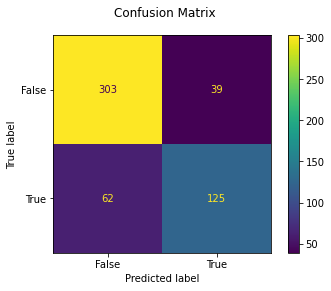

In [13]:
# Optional to run, to evaluate the prediction strength
disp = metrics.ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [14]:
# Optional to run, to evaluate the prediction strength
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predict)}\n")

Classification report for classifier MLPClassifier(hidden_layer_sizes=(2,), max_iter=10000, random_state=1):
              precision    recall  f1-score   support

       False       0.83      0.89      0.86       342
        True       0.76      0.67      0.71       187

    accuracy                           0.81       529
   macro avg       0.80      0.78      0.78       529
weighted avg       0.81      0.81      0.81       529




In [13]:
# Skip all cells until I indicate to resume
dbf=pd.read_excel('uniproteome.xlsx')

/home/gergely/anaconda3/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [14]:
newrows=[]
#for index,row in dbf.iloc[0:10].iterrows():
for index,row in dbf.iterrows():
    for i in range(0,len(row['Sequence'])-15,5):
        crow={}
        crow['Start']=i
        crow['Entry']=row['Entry']
        crow['Entry name']=row['Entry name']
        crow['Protein names']=row['Protein names']
        crow['Peptide']=row['Sequence'][i:i+15]
        crow['Prot_res_pep']=str(crow['Entry name'])+"_"+str(i)+"_"+str(crow['Peptide'])
        newrows.append(crow)
newdbf=pd.DataFrame(newrows)
newdbf

,Start,Entry,Entry name,Protein names,Peptide,Prot_res_pep
0,0,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,MALARPRPRLGDLIE,PLAT2_HUMAN_0_MALARPRPRLGDLIE
1,5,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,PRPRLGDLIEISRFG,PLAT2_HUMAN_5_PRPRLGDLIEISRFG
2,10,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,GDLIEISRFGYAHWA,PLAT2_HUMAN_10_GDLIEISRFGYAHWA
3,15,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,ISRFGYAHWAIYVGD,PLAT2_HUMAN_15_ISRFGYAHWAIYVGD
4,20,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,YAHWAIYVGDGYVVH,PLAT2_HUMAN_20_YAHWAIYVGDGYVVH
...,...,...,...,...,...,...
2214710,935,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,LPRAHTCFNRLDLPP,NED4L_HUMAN_935_LPRAHTCFNRLDLPP
2214711,940,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,TCFNRLDLPPYETFE,NED4L_HUMAN_940_TCFNRLDLPPYETFE
2214712,945,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,LDLPPYETFEDLREK,NED4L_HUMAN_945_LDLPPYETFEDLREK
2214713,950,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,YETFEDLREKLLMAV,NED4L_HUMAN_950_YETFEDLREKLLMAV


In [47]:
transdbf=newdbf['Peptide'].apply(peptrans)

In [48]:
mergedbf = pd.concat([newdbf, transdbf], axis=1, sort=False)

In [4]:
mergedbf=pd.read_pickle("mergedbf.pkl")
#mergedbf.to_pickle("mergedbf.pkl")
#mergedbf['Start']=newdbf['Start']
mergedbf

,Entry,Entry name,Protein names,Peptide,Prot_res_pep,aa,CA-Gly,Pro-MC,Carboxyl,Amide,...,CH,CH3,OH,SH,S,NH3,Arg,MC,Start,Binder
0,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,MALARPRPRLGDLIE,PLAT2_HUMAN_0_MALARPRPRLGDLIE,MALARPRPRLGDLIE,1,4,6,0,...,4,11,0,0,1,0,12,55,0,False
1,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,PRPRLGDLIEISRFG,PLAT2_HUMAN_5_PRPRLGDLIEISRFG,PRPRLGDLIEISRFG,2,4,6,0,...,4,8,1,0,0,0,12,54,5,True
2,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,GDLIEISRFGYAHWA,PLAT2_HUMAN_10_GDLIEISRFGYAHWA,GDLIEISRFGYAHWA,2,0,6,0,...,3,8,1,0,0,0,4,58,10,True
3,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,ISRFGYAHWAIYVGD,PLAT2_HUMAN_15_ISRFGYAHWAIYVGD,ISRFGYAHWAIYVGD,2,0,3,0,...,3,8,1,0,0,0,4,58,15,False
4,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,YAHWAIYVGDGYVVH,PLAT2_HUMAN_20_YAHWAIYVGDGYVVH,YAHWAIYVGDGYVVH,2,0,3,0,...,4,10,0,0,0,0,0,58,20,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214710,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,LPRAHTCFNRLDLPP,NED4L_HUMAN_935_LPRAHTCFNRLDLPP,LPRAHTCFNRLDLPP,0,6,3,3,...,4,8,1,1,0,0,8,54,935,False
2214711,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,TCFNRLDLPPYETFE,NED4L_HUMAN_940_TCFNRLDLPPYETFE,TCFNRLDLPPYETFE,0,4,9,3,...,4,6,2,1,0,0,4,56,940,False
2214712,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,LDLPPYETFEDLREK,NED4L_HUMAN_945_LDLPPYETFEDLREK,LDLPPYETFEDLREK,0,4,15,0,...,4,7,1,0,0,1,4,56,945,True
2214713,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,YETFEDLREKLLMAV,NED4L_HUMAN_950_YETFEDLREKLLMAV,YETFEDLREKLLMAV,0,0,12,0,...,5,11,1,0,1,1,4,60,950,True


In [11]:
X = np.array(mergedbf[[u'CA-Gly', u'Pro-MC', 
         u'Carboxyl', u'Amide',
         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])
X = StandardScaler().fit_transform(X)
predicted=clf.predict(X)

In [12]:
mergedbf['Binder']=predicted

In [15]:
# Mutation analysis
mutlst=[]
#aurka='LEYAPLGTVYRELQKLSKFDEQRTATYITEL'
aurka='EYAPLGTVYRELQKLSKFDEQRTATYITEL'
aurka1=aurka[:15]
aurka2=aurka[5:20]
aurka3=aurka[10:25]
aurka4=aurka[15:30]

for ix,seq in enumerate([aurka1,aurka2,aurka3,aurka4]):
#    seq=  'ACDEFGHKLMNPQRS'
    seq_rng=list(range(211+ix*5,226+ix*5))

    for idx,letpos in enumerate(zip(seq,seq_rng))
        letter,pos=letpos
        print(letter,pos)
        aaset={'A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','Y','V','W'}
        aaset.remove(letter)
        for replet in aaset:
            mutdic={}
            newseq = seq[:idx] + replet + seq[idx+1:]
            mutdic['Peptide']=newseq
            mutdic['Position']=pos
            mutdic['Replet']=replet
            mutdic['Orglet']=letter
            mutdic['Mutation']=str(letter)+str(pos)+str(replet)
            mutlst.append(mutdic)
    mutdic={}
    mutdic['Peptide']=seq
    mutdic['Position']=0
    mutdic['Replet']='WT'
    mutdic['Orglet']='WT'
    mutdic['Mutation']=str(seq_rng[0])+'-'+str(seq_rng[-1])
    mutlst.append(mutdic)

mutdf=pd.DataFrame(mutlst)
mutdf    
    


SyntaxError: invalid syntax (<ipython-input-15-a9b834597bc6>, line 14)

In [96]:
mergemutdf.to_excel('smarca4_mut.xlsx')

,Peptide,Position,Replet,Orglet,Mutation,aa,CA-Gly,Pro-MC,CB,CB-Pro,...,OH-Tyr,CG,CD,CE,OH,SH,S,NH3,Arg,MC
0,WSTPDPPLGGTPRPG,1,W,M,M1W,WSTPDPPLGGTPRPG,3,10,7,5,...,0,9,8,0,3,0,0,0,4,47
1,LSTPDPPLGGTPRPG,1,L,M,M1L,LSTPDPPLGGTPRPG,3,10,7,5,...,0,10,10,0,3,0,0,0,4,47
2,KSTPDPPLGGTPRPG,1,K,M,M1K,KSTPDPPLGGTPRPG,3,10,7,5,...,0,10,9,1,3,0,0,1,4,47
3,QSTPDPPLGGTPRPG,1,Q,M,M1Q,QSTPDPPLGGTPRPG,3,10,7,5,...,0,10,8,0,3,0,0,0,4,47
4,NSTPDPPLGGTPRPG,1,N,M,M1N,NSTPDPPLGGTPRPG,3,10,7,5,...,0,9,8,0,3,0,0,0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98395,EEDRSGSGSEEDEEP,1650,P,E,E1650P,EEDRSGSGSEEDEEP,2,2,12,1,...,0,8,2,0,3,0,0,0,4,56
98396,EEDRSGSGSEEDEEA,1650,A,E,E1650A,EEDRSGSGSEEDEEA,2,0,13,0,...,0,7,1,0,3,0,0,0,4,58
98397,EEDRSGSGSEEDEEV,1650,V,E,E1650V,EEDRSGSGSEEDEEV,2,0,13,0,...,0,9,1,0,3,0,0,0,4,58
98398,EEDRSGSGSEEDEET,1650,T,E,E1650T,EEDRSGSGSEEDEET,2,0,13,0,...,0,8,1,0,4,0,0,0,4,58


In [107]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [19]:
newdbf[newdbf.Entry=='P51532']

,Start,Entry,Entry name,Protein names,Peptide,Prot_res_pep
1542650,0,P51532,SMCA4_HUMAN,Transcription activator BRG1 (EC 3.6.4.-) (ATP...,MSTPDPPLGGTPRPG,SMCA4_HUMAN_0_MSTPDPPLGGTPRPG
1542651,5,P51532,SMCA4_HUMAN,Transcription activator BRG1 (EC 3.6.4.-) (ATP...,PPLGGTPRPGPSPGP,SMCA4_HUMAN_5_PPLGGTPRPGPSPGP
1542652,10,P51532,SMCA4_HUMAN,Transcription activator BRG1 (EC 3.6.4.-) (ATP...,TPRPGPSPGPGPSPG,SMCA4_HUMAN_10_TPRPGPSPGPGPSPG
1542653,15,P51532,SMCA4_HUMAN,Transcription activator BRG1 (EC 3.6.4.-) (ATP...,PSPGPGPSPGAMLGP,SMCA4_HUMAN_15_PSPGPGPSPGAMLGP
1542654,20,P51532,SMCA4_HUMAN,Transcription activator BRG1 (EC 3.6.4.-) (ATP...,GPSPGAMLGPSPGPS,SMCA4_HUMAN_20_GPSPGAMLGPSPGPS
...,...,...,...,...,...,...
1542972,1610,P51532,SMCA4_HUMAN,Transcription activator BRG1 (EC 3.6.4.-) (ATP...,GGRRRPSRGSRAKPV,SMCA4_HUMAN_1610_GGRRRPSRGSRAKPV
1542973,1615,P51532,SMCA4_HUMAN,Transcription activator BRG1 (EC 3.6.4.-) (ATP...,PSRGSRAKPVVSDDD,SMCA4_HUMAN_1615_PSRGSRAKPVVSDDD
1542974,1620,P51532,SMCA4_HUMAN,Transcription activator BRG1 (EC 3.6.4.-) (ATP...,RAKPVVSDDDSEEEQ,SMCA4_HUMAN_1620_RAKPVVSDDDSEEEQ
1542975,1625,P51532,SMCA4_HUMAN,Transcription activator BRG1 (EC 3.6.4.-) (ATP...,VSDDDSEEEQEEDRS,SMCA4_HUMAN_1625_VSDDDSEEEQEEDRS


In [15]:
# Resume from here!
import requests

def get_uniprot_sequence(entry_id):
    url = f"https://www.uniprot.org/uniprot/{entry_id}.fasta"
    response = requests.get(url)
    
    if response.status_code == 200:
        # Extract the sequence from the response content
        lines = response.text.strip().split("\n")
        sequence = ''.join(lines[1:])  # Exclude the header line starting with ">"
        return sequence
    else:
        print(f"Failed to retrieve UniProt entry: {response.status_code}")

# Example usage, do not worry about it, the function above will be called later
entry_id = "P51532"  # Replace with your UniProt entry ID
sequence = get_uniprot_sequence(entry_id)
print(f"Sequence for UniProt entry {entry_id}:")
print(sequence)

Sequence for UniProt entry P51532:
MSTPDPPLGGTPRPGPSPGPGPSPGAMLGPSPGPSPGSAHSMMGPSPGPPSAGHPIPTQGPGGYPQDNMHQMHKPMESMHEKGMSDDPRYNQMKGMGMRSGGHAGMGPPPSPMDQHSQGYPSPLGGSEHASSPVPASGPSSGPQMSSGPGGAPLDGADPQALGQQNRGPTPFNQNQLHQLRAQIMAYKMLARGQPLPDHLQMAVQGKRPMPGMQQQMPTLPPPSVSATGPGPGPGPGPGPGPGPAPPNYSRPHGMGGPNMPPPGPSGVPPGMPGQPPGGPPKPWPEGPMANAAAPTSTPQKLIPPQPTGRPSPAPPAVPPAASPVMPPQTQSPGQPAQPAPMVPLHQKQSRITPIQKPRGLDPVEILQEREYRLQARIAHRIQELENLPGSLAGDLRTKATIELKALRLLNFQRQLRQEVVVCMRRDTALETALNAKAYKRSKRQSLREARITEKLEKQQKIEQERKRRQKHQEYLNSILQHAKDFKEYHRSVTGKIQKLTKAVATYHANTEREQKKENERIEKERMRRLMAEDEEGYRKLIDQKKDKRLAYLLQQTDEYVANLTELVRQHKAAQVAKEKKKKKKKKKAENAEGQTPAIGPDGEPLDETSQMSDLPVKVIHVESGKILTGTDAPKAGQLEAWLEMNPGYEVAPRSDSEESGSEEEEEEEEEEQPQAAQPPTLPVEEKKKIPDPDSDDVSEVDARHIIENAKQDVDDEYGVSQALARGLQSYYAVAHAVTERVDKQSALMVNGVLKQYQIKGLEWLVSLYNNNLNGILADEMGLGKTIQTIALITYLMEHKRINGPFLIIVPLSTLSNWAYEFDKWAPSVVKVSYKGSPAARRAFVPQLRSGKFNVLLTTYEYIIKDKHILAKIRWKYMIVDEGHRMKNHHCKLTQVLNTHYVAPRRLLLTGTPLQNKLPELWALLNFLLPTIFKSCSTFEQWFNAPFAMTGEKVDLNEEETILII

In [16]:
import requests
import re

def get_uniprot_entries(pdb_id):
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    pdb_data = response.text
    
    uniprot_entries = []
    
    for line in pdb_data.split('\n'):
        if line.startswith('DBREF') and 'UNP' in line:
            match = re.search(r'UNP\s+(\w+)', line)
            if match:
                uniprot_entry = match.group(1)
                chain_id = line[12]
                uniprot_entries.append((chain_id, uniprot_entry))
    
    return uniprot_entries

# Example usage
pdb_id = '6TLC'  # Replace with your desired PDB ID
uniprot_entries = get_uniprot_entries(pdb_id)

# Print the retrieved chains and UniProt entries
entries=[]
for chain_id, uniprot_entry in uniprot_entries:
    print(f"Chain {chain_id}: UniProt Entry {uniprot_entry}")
    entries.append(uniprot_entry)
entries= list(set(entries))
entries

Chain B: UniProt Entry P40763
Chain A: UniProt Entry P40763


['P40763']

MAQWNQLQQLDTRYL
QLQQLDTRYLEQLHQ
DTRYLEQLHQLYSDS
EQLHQLYSDSFPMEL
LYSDSFPMELRQFLA
FPMELRQFLAPWIES
RQFLAPWIESQDWAY
PWIESQDWAYAASKE
QDWAYAASKESHATL
AASKESHATLVFHNL
SHATLVFHNLLGEID
VFHNLLGEIDQQYSR
LGEIDQQYSRFLQES
QQYSRFLQESNVLYQ
FLQESNVLYQHNLRR
NVLYQHNLRRIKQFL
HNLRRIKQFLQSRYL
IKQFLQSRYLEKPME
QSRYLEKPMEIARIV
EKPMEIARIVARCLW
IARIVARCLWEESRL
ARCLWEESRLLQTAA
EESRLLQTAATAAQQ
LQTAATAAQQGGQAN
TAAQQGGQANHPTAA
GGQANHPTAAVVTEK
HPTAAVVTEKQQMLE
VVTEKQQMLEQHLQD
QQMLEQHLQDVRKRV
QHLQDVRKRVQDLEQ
VRKRVQDLEQKMKVV
QDLEQKMKVVENLQD
KMKVVENLQDDFDFN
ENLQDDFDFNYKTLK
DFDFNYKTLKSQGDM
YKTLKSQGDMQDLNG
SQGDMQDLNGNNQSV
QDLNGNNQSVTRQKM
NNQSVTRQKMQQLEQ
TRQKMQQLEQMLTAL
QQLEQMLTALDQMRR
MLTALDQMRRSIVSE
DQMRRSIVSELAGLL
SIVSELAGLLSAMEY
LAGLLSAMEYVQKTL
SAMEYVQKTLTDEEL
VQKTLTDEELADWKR
TDEELADWKRRQQIA
ADWKRRQQIACIGGP
RQQIACIGGPPNICL
CIGGPPNICLDRLEN
PNICLDRLENWITSL
DRLENWITSLAESQL
WITSLAESQLQTRQQ
AESQLQTRQQIKKLE
QTRQQIKKLEELQQK
IKKLEELQQKVSYKG
ELQQKVSYKGDPIVQ
VSYKGDPIVQHRPML
DPIVQHRPMLEERIV
HRPMLEERIVELFRN
EERIVELFRNLMKSA
ELFRNLMK

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


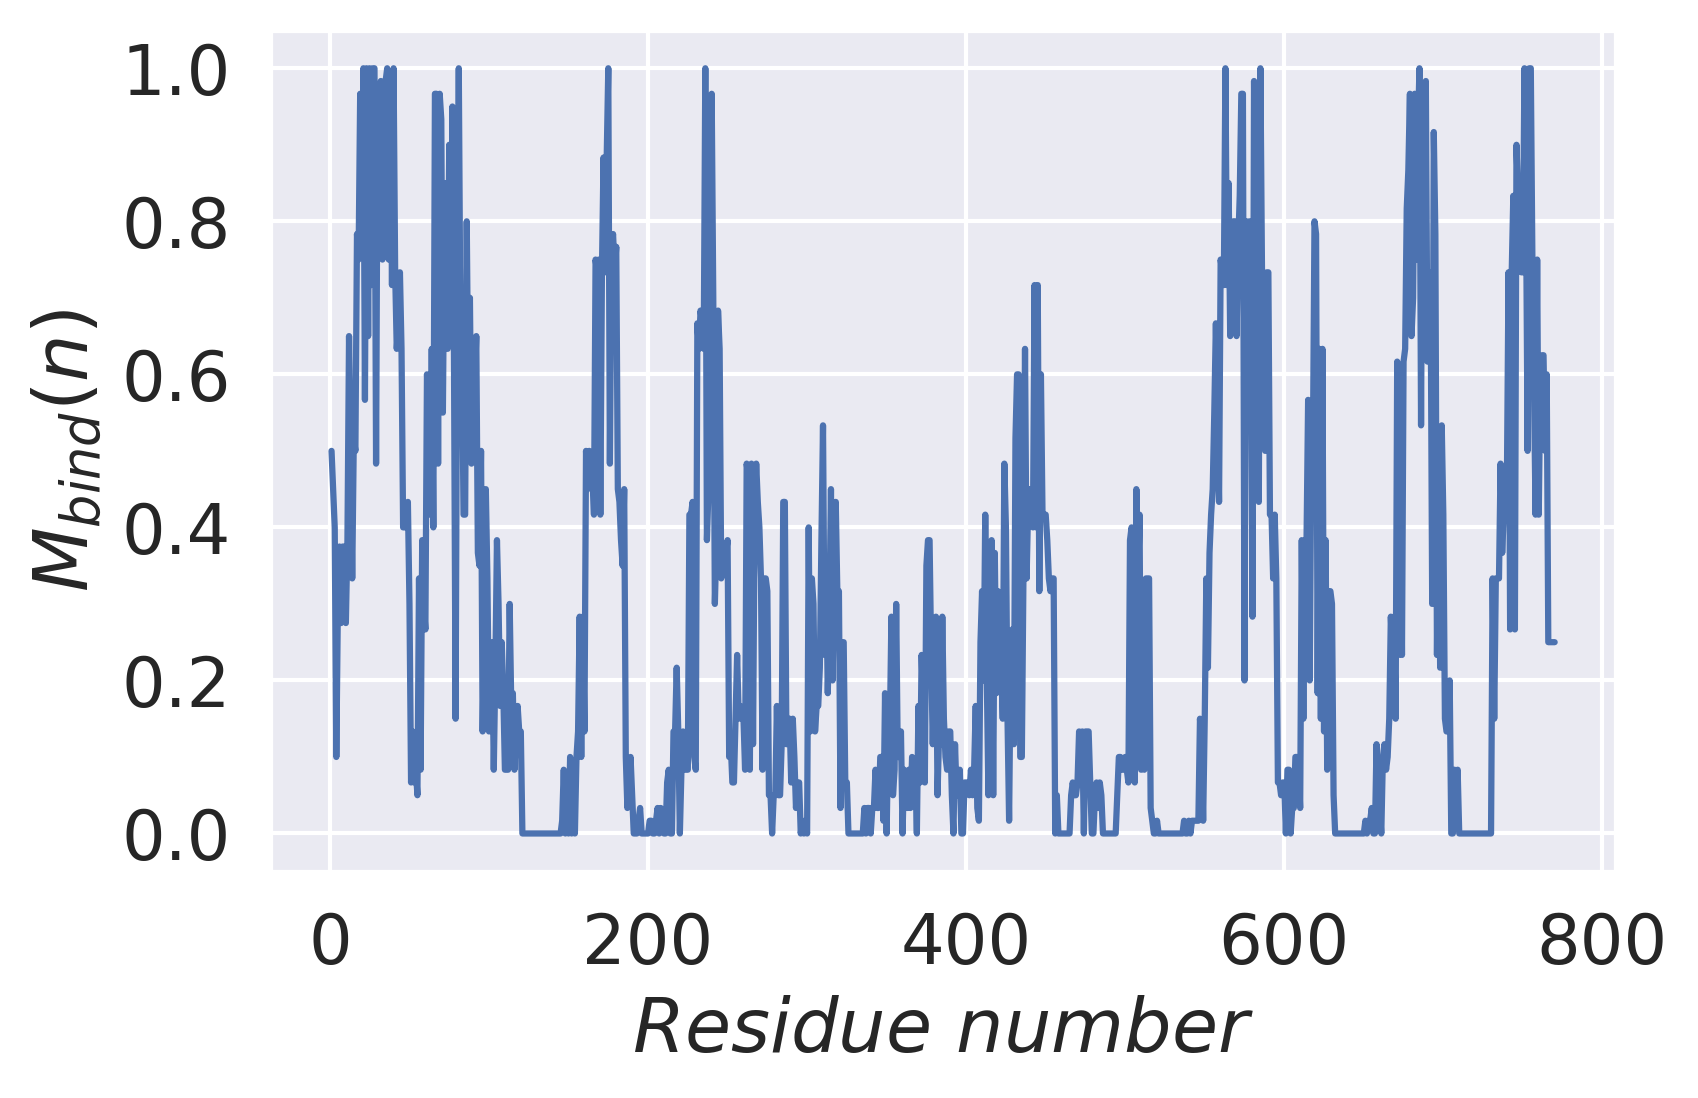

In [17]:
# Mutation analysis, where the heavy lifting is done
import matplotlib as mpl
for entry_id in entries:
    protein = get_uniprot_sequence(entry_id)
    steps=len(protein)//5
    frags=[]
    for i in range(0,steps-2):
        frags.append(protein[i*5:i*5+15])
   
    mutlst=[]
    for ix,seq in enumerate(frags):
        print(seq)
        seq_rng=list(range(1+ix*5,16+ix*5))

        for idx,letpos in enumerate(zip(seq,seq_rng)):
            letter,pos=letpos
            aaset={'A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','Y','V','W'}
            for replet in aaset:
                mutdic={}
                newseq = seq[:idx] + replet + seq[idx+1:]
                mutdic['Peptide']=newseq
                mutdic['Position']=pos
                mutdic['Replet']=replet
                mutdic['Orglet']=letter
                mutdic['Mutation']=str(letter)+str(pos)+str(replet)
                mutlst.append(mutdic)

    mutdf=pd.DataFrame(mutlst)
    
    tmutdf=mutdf['Peptide'].apply(peptrans)
    mergemutdf = pd.concat([mutdf, tmutdf], axis=1, sort=False)

    #X = np.array(mergemutdf[[u'CA-Gly', u'Pro-MC', 
    #         u'Carboxyl', u'Amide',
    #         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
    #         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])

    X = np.array(mergemutdf[
        [u'CA-Gly', u'Pro-MC', u'CB', u'CB-Pro',
            u'Carboxyl', u'Amide',
            u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CG', u'CD', u'CE',
            u'OH', u'SH', u'S', u'NH3', u'Arg',u'MC']])

    X = sc.transform(X)
    predicted=clf.predict(X)
    mergemutdf['Binder']=predicted
    posrob=[]
    rows=[]
    for i in range(1,steps*5+1):
        row={}
        bind=len(mergemutdf[mergemutdf.Position==i][mergemutdf.Binder==True])
        nobind=len(mergemutdf[mergemutdf.Position==i][mergemutdf.Binder==False])
        rob=bind/(bind+nobind)
        posrob.append(rob)
        row['Position_fasta']=i
        row['Entry']=entry_id
        row['robbind']=rob
        row['resname_fasta']=protein[i-1]
        rows.append(row)
    posarr=np.vstack([range(1,steps*5+1),posrob])
    #np.savez(entry_id+'.npz',posarr)
    prdf=pd.DataFrame(rows)
    prdf.to_excel(entry_id+'_robbind.xlsx')
    

    mpl.style.use('seaborn-ticks')
    #sns.set_style("ticks")
    sns.set(font_scale=1.5)
    fig,ax=plt.subplots(1,tight_layout=True,dpi=300)

    ax.plot(range(1,steps*5+1),posrob)
    ax.set_xlabel(r'$Residue\ number$')
    ax.set_ylabel(r'$M_{bind}(n)$')
    plt.savefig(entry_id+'_robbind.pdf')

In [34]:
entry_id='Q969G3'
prdf=pd.read_excel(entry_id+'_robbind.xlsx')
mpl.style.use('seaborn-ticks')
#sns.set_style("ticks")
sns.set(font_scale=1.5)
fig,ax=plt.subplots(1,tight_layout=True,dpi=300)

ax.plot(prdf['Position_fasta'],prdf['robbind'])
ax.set_xlabel(r'$Residue\ number$')
ax.set_ylabel(r'$M_{bind}(n)$')
plt.savefig(entry_id+'_robbind.pdf')

In [33]:
# You do not need this and anything after this
(steps)*5

1645

In [19]:
ax.set_ylabel(r'$M_{bind}(n)$')

Text(102.99999999999999, 0.5, '$M_{bind}(n)$')

In [39]:
posrob=[]
for i in range(1,steps*5+1):
    bind=len(mergemutdf[mergemutdf.Position==i][mergemutdf.Binder==True])
    nobind=len(mergemutdf[mergemutdf.Position==i][mergemutdf.Binder==False])
    rob=bind/(bind+nobind)
    posrob.append(rob)
    

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFram

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFram

In [22]:
%matplotlib qt
import matplotlib as mpl
mpl.style.use('seaborn-ticks')
#sns.set_style("ticks")
sns.set(font_scale=1.5)
fig,ax=plt.subplots(1,tight_layout=True,dpi=300)

ax.plot(range(1,steps*5+1),posrob)
ax.set_xlabel(r'$Residue\ number$')
ax.set_ylabel(r'$M_{bind}(n)$')
#plt.savefig('smarca4_robbind.png')

Text(0, 0.5, '$M_{bind}(n)$')

In [41]:
posarr=np.vstack([range(1,steps*5+1),posrob])
np.savez(entry_id+'.npz',posarr)

In [95]:
mutdf[mutdf.Position==1]

,Peptide,Position,Replet,Orglet,Mutation
0,WSTPDPPLGGTPRPG,1,W,M,M1W
1,LSTPDPPLGGTPRPG,1,L,M,M1L
2,KSTPDPPLGGTPRPG,1,K,M,M1K
3,QSTPDPPLGGTPRPG,1,Q,M,M1Q
4,NSTPDPPLGGTPRPG,1,N,M,M1N
5,GSTPDPPLGGTPRPG,1,G,M,M1G
6,MSTPDPPLGGTPRPG,1,M,M,M1M
7,RSTPDPPLGGTPRPG,1,R,M,M1R
8,SSTPDPPLGGTPRPG,1,S,M,M1S
9,FSTPDPPLGGTPRPG,1,F,M,M1F
